In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [6]:
file_path = 'C:/Users/arhaa/breast-cancer/breast_cancer_data.csv'
data = pd.read_csv(file_path)
data.head()

# We use logistic regression to predict whether the cancer is malignant or benign

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
# We will drop the id column and the Unnamed: 32 column as they are not needed for the model
data = data.drop(['id', 'Unnamed: 32'], axis = 1)
# we use axis = 1 to drop the columns and axis = 0 to drop the rows
# In machine learning, the algorithms are not able to learn from characters or test data, so we convert the diagnosis column to numerical data so that the algorithm can learn from it.

In [8]:
# So, we have the diagnosis in two states M and B. We can convert them into numerical data using something called label encoding.
# Label encoding is a process of converting categorical data into numerical data so that the machine learning algorithm can understand it.
# We will encode M as 1 and B as 0.
data['diagnosis'] = data['diagnosis'].map({"M": 1, "B": 0})
# So this maps the entire "diagnosis" column and looks for M and B and replaces them with 1 and 0 respectively.

# Let's create variables to separate the features and the target variable
X = data.drop('diagnosis', axis = 1) # Features. This is everything except the diagnosis column
y = data['diagnosis'] # Target variable. This is the diagnosis column



In [9]:
# Now, we split the data into training and testing data. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [10]:
scaler = StandardScaler()
# This creates an instance of the StandardScaler class. StandardScaler is used to standardize features by removing the mean and scaling to unit variance.
X_train = scaler.fit_transform(X_train)
# This line does two things:
# It fits the scaler to the training data (X_train), calculating the mean and standard deviation of each feature.
# It then transforms the training data using these calculated statistics.
# The result is that each feature in X_train will have a mean of 0 and a standard deviation of 1.
X_test = scaler.transform(X_test)
# This line applies the same scaling to the test data. It's important to note that we only use transform() here, not fit_transform(). This ensures that we're using the same scaling parameters (mean and standard deviation) that were calculated from the training data.
# The purpose of this scaling is to:
# Ensure all features are on a similar scale, which can be important for many machine learning algorithms.
# Prevent features with larger magnitudes from dominating the model training process.
# Improve the convergence of many optimization algorithms used in machine learning models.
# This step is particularly important for algorithms like logistic regression (which I am using in this code) that are sensitive to the scale of input features.

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model trained successfully")

Model trained successfully


Accuracy: 0.9736842105263158
Confusion Matrix:
[[70  1]
 [ 2 41]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



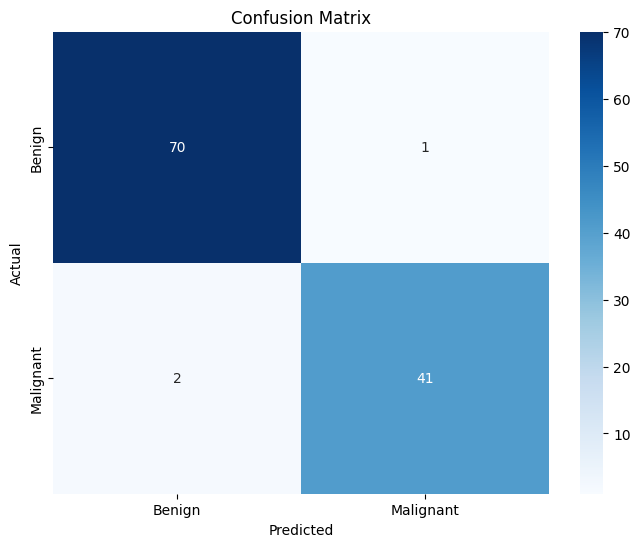

In [12]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(report)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()